# MTH 9855 Homework 7

## Junliang Zhou

Tel: (347) 276-1207

Email: gjimzhou@gmail.com

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce 

In [92]:
allData=pd.read_csv("monthlyRets-clean.csv")
allData['DATE']=pd.to_datetime(allData['DATE'])
allData.head()

,DATE,country.aut.previous.usdcap,country.aut.totret,country.bel.previous.usdcap,country.bel.totret,country.che.previous.usdcap,country.che.totret,country.deu.previous.usdcap,country.deu.totret,country.dnk.previous.usdcap,...,country.ita.previous.usdcap,country.ita.totret,country.nld.previous.usdcap,country.nld.totret,country.nor.previous.usdcap,country.nor.totret,country.prt.previous.usdcap,country.prt.totret,country.swe.previous.usdcap,country.swe.totret
0,2000-02-29,1.310790e+10,-0.051045,1.034299e+11,-0.028266,5.317534e+11,0.003903,1.100294e+12,0.145695,6.283578e+10,...,5.286047e+11,0.177676,5.878418e+11,0.086427,2.398832e+10,0.004348,5.571320e+10,0.122017,2.847184e+11,0.204688
1,2000-03-31,1.224056e+10,0.045976,9.889099e+10,0.006910,5.258682e+11,0.081099,1.075169e+12,-0.001392,6.511032e+10,...,6.189442e+11,-0.072412,6.289986e+11,0.014711,2.375084e+10,0.035176,6.151492e+10,-0.063432,3.438037e+11,-0.050949
2,2000-04-30,1.272333e+10,0.015384,9.482092e+10,0.014342,5.732435e+11,-0.001377,1.070262e+12,-0.043046,7.312476e+10,...,6.414231e+11,-0.018850,6.402472e+11,0.005666,2.277300e+10,0.040373,6.430140e+10,-0.056198,3.393782e+11,0.031323
3,2000-05-31,1.230309e+10,0.031812,9.199037e+10,0.040011,5.501755e+11,0.043772,9.722837e+11,-0.033461,6.241986e+10,...,5.936028e+11,0.013116,6.084458e+11,0.004167,2.176592e+10,0.061513,5.742627e+10,-0.032379,3.405954e+11,-0.035812
4,2000-06-30,1.287187e+10,-0.013370,9.837601e+10,0.044092,5.814097e+11,0.004620,9.517296e+11,-0.034353,6.638543e+10,...,6.095131e+11,0.024677,6.191823e+11,0.018869,2.297543e+10,0.053950,5.592946e+10,0.008374,3.257530e+11,-0.039925


In [97]:
capData=allData.iloc[:,1::2].copy()
retData=allData.iloc[:,2::2].copy()

capCols=capData.columns.values.tolist()
retCols=retData.columns.values.tolist()

countryDatas=[]
for capCol,retCol in zip(capCols,retCols):
    country=capCol.split('.')[1]
    countryData=pd.DataFrame(allData['DATE'])
    countryData['COUNTRY']=country
    countryData['USDCAP']=capData[capCol]
    countryData['TOTRET']=retData[retCol]
    countryDatas.append(countryData)
    
allDataCleaned=pd.concat(countryDatas)
allDataCleaned.head()

,DATE,COUNTRY,USDCAP,TOTRET
0,2000-02-29,aut,1.310790e+10,-0.051045
1,2000-03-31,aut,1.224056e+10,0.045976
2,2000-04-30,aut,1.272333e+10,0.015384
3,2000-05-31,aut,1.230309e+10,0.031812
4,2000-06-30,aut,1.287187e+10,-0.013370


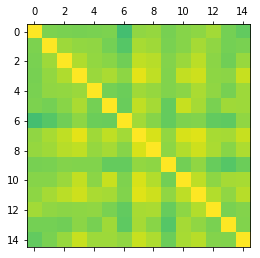

In [107]:
retCorr=allDataCleaned.pivot('DATE','COUNTRY')['TOTRET'].corr()
plt.matshow(retCorr, vmin=-1, vmax=1)
plt.show()

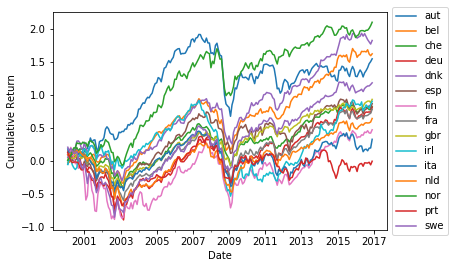

In [95]:
allDataCleaned['CUMRET']=allDataCleaned.groupby('COUNTRY')['TOTRET'].cumsum()
allDataCleaned.set_index('DATE', inplace=True)
allDataCleaned.groupby('COUNTRY')['CUMRET'].plot()
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()